In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
from scipy.stats import shapiro, levene, f_oneway, kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

df = pd.read_csv('WA_Marketing-Campaign.csv')

In [2]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
df['Promotion'] = df['Promotion'].astype(str)

In [5]:
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548,548.000000,548.000000,548,548.000000,548.000000
unique,NaN,3,NaN,NaN,3,NaN,NaN
top,NaN,Medium,NaN,NaN,3,NaN,NaN
freq,NaN,320,NaN,NaN,188,NaN,NaN
mean,5.715328,NaN,479.656934,8.503650,NaN,2.500000,53.466204
std,2.877001,NaN,287.973679,6.638345,NaN,1.119055,16.755216
min,1.000000,NaN,1.000000,1.000000,NaN,1.000000,17.340000
25%,3.000000,NaN,216.000000,4.000000,NaN,1.750000,42.545000
50%,6.000000,NaN,504.000000,7.000000,NaN,2.500000,50.200000
75%,8.000000,NaN,708.000000,12.000000,NaN,3.250000,60.477500


<Figure size 1000x600 with 0 Axes>

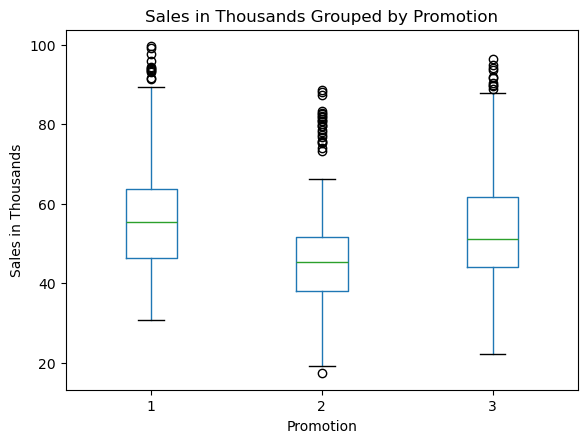

In [8]:
plt.figure(figsize=(10, 6))
df.boxplot(column='SalesInThousands', by='Promotion', grid=False)

plt.title("Sales in Thousands Grouped by Promotion")
plt.suptitle("")  
plt.xlabel("Promotion")
plt.ylabel("Sales in Thousands")

plt.show()


In [9]:
df.groupby(["MarketSize", "week"]).agg({"SalesInThousands": ["count", "mean", "sum"]})

SalesInThousands                    
                           count       mean      sum
MarketSize week                                     
Large      1                  42  70.793333  2973.32
           2                  42  68.656667  2883.58
           3                  42  70.647381  2967.19
           4                  42  70.369524  2955.52
Medium     1                  80  44.403875  3552.31
           2                  80  44.378125  3550.25
           3                  80  44.107500  3528.60
           4                  80  43.051875  3444.15
Small      1                  15  56.245333   843.68
           2                  15  58.675333   880.13
           3                  15  55.348667   830.23
           4                  15  59.368000   890.52

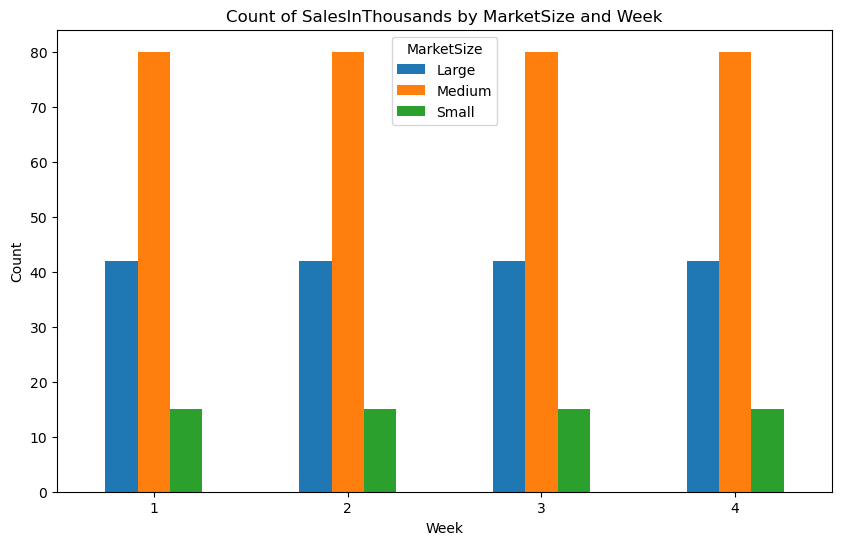

In [10]:
grouped = df.groupby(["MarketSize", "week"]).agg({"SalesInThousands": "count"}).reset_index()

# Pivot the data for plotting
pivot_df = grouped.pivot(index='week', columns='MarketSize', values='SalesInThousands')

# Plotting
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Count of SalesInThousands by MarketSize and Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='MarketSize')
plt.show()

In [11]:
df.groupby(["MarketSize", "Promotion"]).agg({"SalesInThousands": ["mean", "median"]})

SalesInThousands        
                                 mean  median
MarketSize Promotion                         
Large      1                75.235893  72.835
           2                60.322031  53.010
           3                77.203958  82.345
Medium     1                47.672604  47.425
           2                39.114352  39.765
           3                45.468879  46.295
Small      1                60.162500  61.145
           2                50.810625  51.600
           3                59.514167  59.745

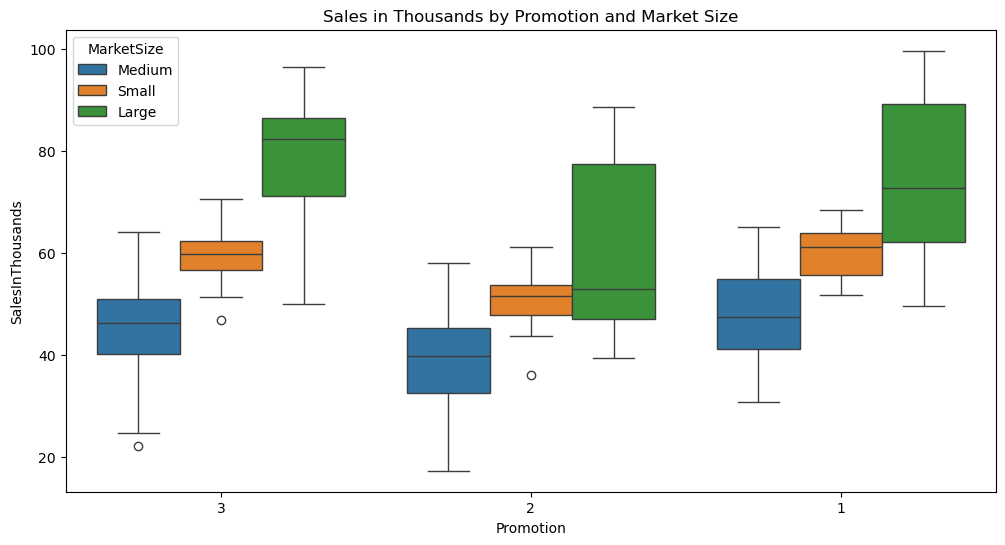

In [12]:
# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', hue='MarketSize', data=df)
plt.title('Sales in Thousands by Promotion and Market Size')
plt.show()

H0 = G1 = G2 = G3 -> No statistically significant difference between the sales of the promotions 


H1 = G1 <> G2 <> G3 -> IS statistically significant difference between the sales of the promotions 


In [13]:
from scipy.stats import shapiro, levene, f_oneway, kruskal

test_stat, pvalue = shapiro(df.loc[df["week"] == 1, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 2, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 3, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["week"] == 4, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Test Stat = 0.8891, p-value = 0.0000
Test Stat = 0.9485, p-value = 0.0001
Test Stat = 0.9335, p-value = 0.0000
Test Stat = 0.9477, p-value = 0.0000


the null hypothesis is rejected and there is evidence that the data tested are not normally distributed

In [14]:
model = ols('SalesInThousands ~ C(Promotion)', data = df).fit()

anova_table = sm.stats.anova_lm(model, type=2)
print(anova_table)

                 df         sum_sq      mean_sq          F        PR(>F)
C(Promotion)    2.0   11449.174291  5724.587145  21.953486  6.765849e-10
Residual      545.0  142114.105414   260.759826        NaN           NaN


The promotion type has a significant effect on sales. The p-value is very small (much less than 0.05), so we can reject the null hypothesis that there are no differences in sales among the different promotions.


In [15]:
# ANOVA and Tukey HSD test for each market size
def analyze_market_size(data, market_size):
    subset = data[data['MarketSize'] == market_size]
    model = ols('SalesInThousands ~ C(Promotion)', data=subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA results for Market Size {market_size}:\n", anova_table)
    
    # Post-hoc 
    mc = multi.MultiComparison(subset['SalesInThousands'], subset['Promotion'])
    tukey_result = mc.tukeyhsd()
    print(f"Tukey HSD results for Market Size {market_size}:\n", tukey_result)
    
    return anova_table, tukey_result



In [16]:
# Analyze each market size
market_sizes = df['MarketSize'].unique()
results = {}
for market_size in market_sizes:
    results[market_size] = analyze_market_size(df, market_size)

ANOVA results for Market Size Medium:
                     sum_sq     df          F        PR(>F)
C(Promotion)   4122.975904    2.0  29.688134  1.519740e-12
Residual      22011.881458  317.0        NaN           NaN
Tukey HSD results for Market Size Medium:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5583    0.0 -11.3107 -5.8058   True
     1      3  -2.2037 0.1356  -4.9111  0.5037  False
     2      3   6.3545    0.0   3.7307  8.9783   True
-----------------------------------------------------
ANOVA results for Market Size Small:
                    sum_sq    df          F    PR(>F)
C(Promotion)   954.613521   2.0  16.576481  0.000002
Residual      1641.270252  57.0        NaN       NaN
Tukey HSD results for Market Size Small:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
------------------

### Market Size: Small -> Promotion 1
**ANOVA Results:**
- Promotions significantly affect SalesInThousands (F(2, 57) = 16.576, p < 0.001).

**Tukey HSD Results:**
- Promotion 1 vs Promotion 2: Mean difference = -9.3519, p < 0.001 (Reject Null Hypothesis).
- Promotion 1 vs Promotion 3: Mean difference = -0.6483, p = 0.916 (Fail to Reject Null Hypothesis).
- Promotion 2 vs Promotion 3: Mean difference = 8.7035, p < 0.001 (Reject Null Hypothesis).

### Market Size: Medium -> Promotion 1
**ANOVA Results:**
- Promotions significantly affect SalesInThousands (F(2, 317) = 29.688, p < 0.001).

**Tukey HSD Results:**
- Promotion 1 vs Promotion 2: Mean difference = -8.5583, p < 0.001 (Reject Null Hypothesis).
- Promotion 1 vs Promotion 3: Mean difference = -2.2037, p = 0.136 (Fail to Reject Null Hypothesis).
- Promotion 2 vs Promotion 3: Mean difference = 6.3545, p < 0.001 (Reject Null Hypothesis).

### Market Size: Large -> Promotion 3
**ANOVA Results:**
- Promotions significantly affect SalesInThousands (F(2, 165) = 21.445, p < 0.001).

**Tukey HSD Results:**
- Promotion 1 vs Promotion 2: Mean difference = -14.9139, p < 0.001 (Reject Null Hypothesis).
- Promotion 1 vs Promotion 3: Mean difference = 1.9681, p = 0.790 (Fail to Reject Null Hypothesis).
- Promotion 2 vs Promotion 3: Mean difference = 16.8819, p < 0.001 (Reject Null Hypothesis).
